In [1]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np

from PIL import Image
from transform_factory import resize_322, center_crop_224, imagenet_normalize, tensorize, get_spatial_transform, get_color_transform
from torchvision import transforms
from expl import ExplFactory
from captum.attr import visualization as viz
from torchvision.models import resnet50, ResNet50_Weights

In [2]:
# orig_img_path = "/home/juhyeon/Imagenet/train/n02100236/n02100236_18.JPEG"
# orig_img_path = "/home/juhyeon/Imagenet/train/n01443537/n01443537_605.JPEG"
orig_img_path = "/home/juhyeon/Imagenet/train/n01614925/n01614925_13.JPEG"

model = resnet50(weights = ResNet50_Weights.DEFAULT).eval().cuda()


orig_img = Image.open(orig_img_path)
_orig_img = tensorize(resize_322(orig_img)).unsqueeze(0).cuda()

expl_method = "GradCAM"
expl_func = ExplFactory().get_explainer(model = model, expl_method = expl_method)


-0.0026283213


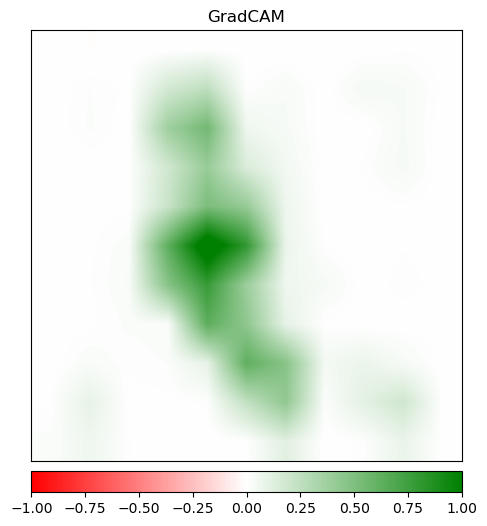

In [4]:
attr = expl_func(_orig_img)
attr = np.transpose(attr.squeeze(0).cpu().detach().numpy(), (1,2,0))

_ = viz.visualize_image_attr(attr, np.transpose(_orig_img.squeeze().cpu().detach().numpy(), (1,2,0)), sign = 'all', show_colorbar=True, title = expl_method)